#### Data Dictionary:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10

Class: (2 for benign, 4 for malignant)

Malignant==> Cancerous

Benign==> Not Cancerous (Healthy)

In [1]:
#Loading Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = 'https://raw.githubusercontent.com/gaurab456/Wisconsin-Breast-Cancer-Classification/main/breastCancer.csv'
data = pd.read_csv(url)
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [16]:
data.info()
print('data shape :' +str(data.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
data shape :(699, 11)


In [7]:
data.describe()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [9]:
data['bare_nucleoli'].value_counts()
#There is a ? in feature 'bare_nucleoli'

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

In [21]:
data['class'].value_counts()/data.shape[0]*100

2    65.522175
4    34.477825
Name: class, dtype: float64

In [25]:
data['bare_nucleoli'].mode()[0]

'1'

In [35]:
# Replacing '?' with mode of 'bare_nucleoli'
data['bare_nucleoli'].replace('?',data['bare_nucleoli'].mode()[0],inplace=True)
data['bare_nucleoli'] = data['bare_nucleoli'].astype('int64')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 699 non-null    int64
 1   clump_thickness    699 non-null    int64
 2   size_uniformity    699 non-null    int64
 3   shape_uniformity   699 non-null    int64
 4   marginal_adhesion  699 non-null    int64
 5   epithelial_size    699 non-null    int64
 6   bare_nucleoli      699 non-null    int64
 7   bland_chromatin    699 non-null    int64
 8   normal_nucleoli    699 non-null    int64
 9   mitoses            699 non-null    int64
 10  class              699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


### EDA

In [38]:
data2 = data.copy()
data2.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [41]:
data2.isnull().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [42]:
#Id column is note required for our analysis
data2.drop(columns='id',axis=1,inplace=True)

In [43]:
data2.columns

Index(['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026898A81808>,
      dtype=object)

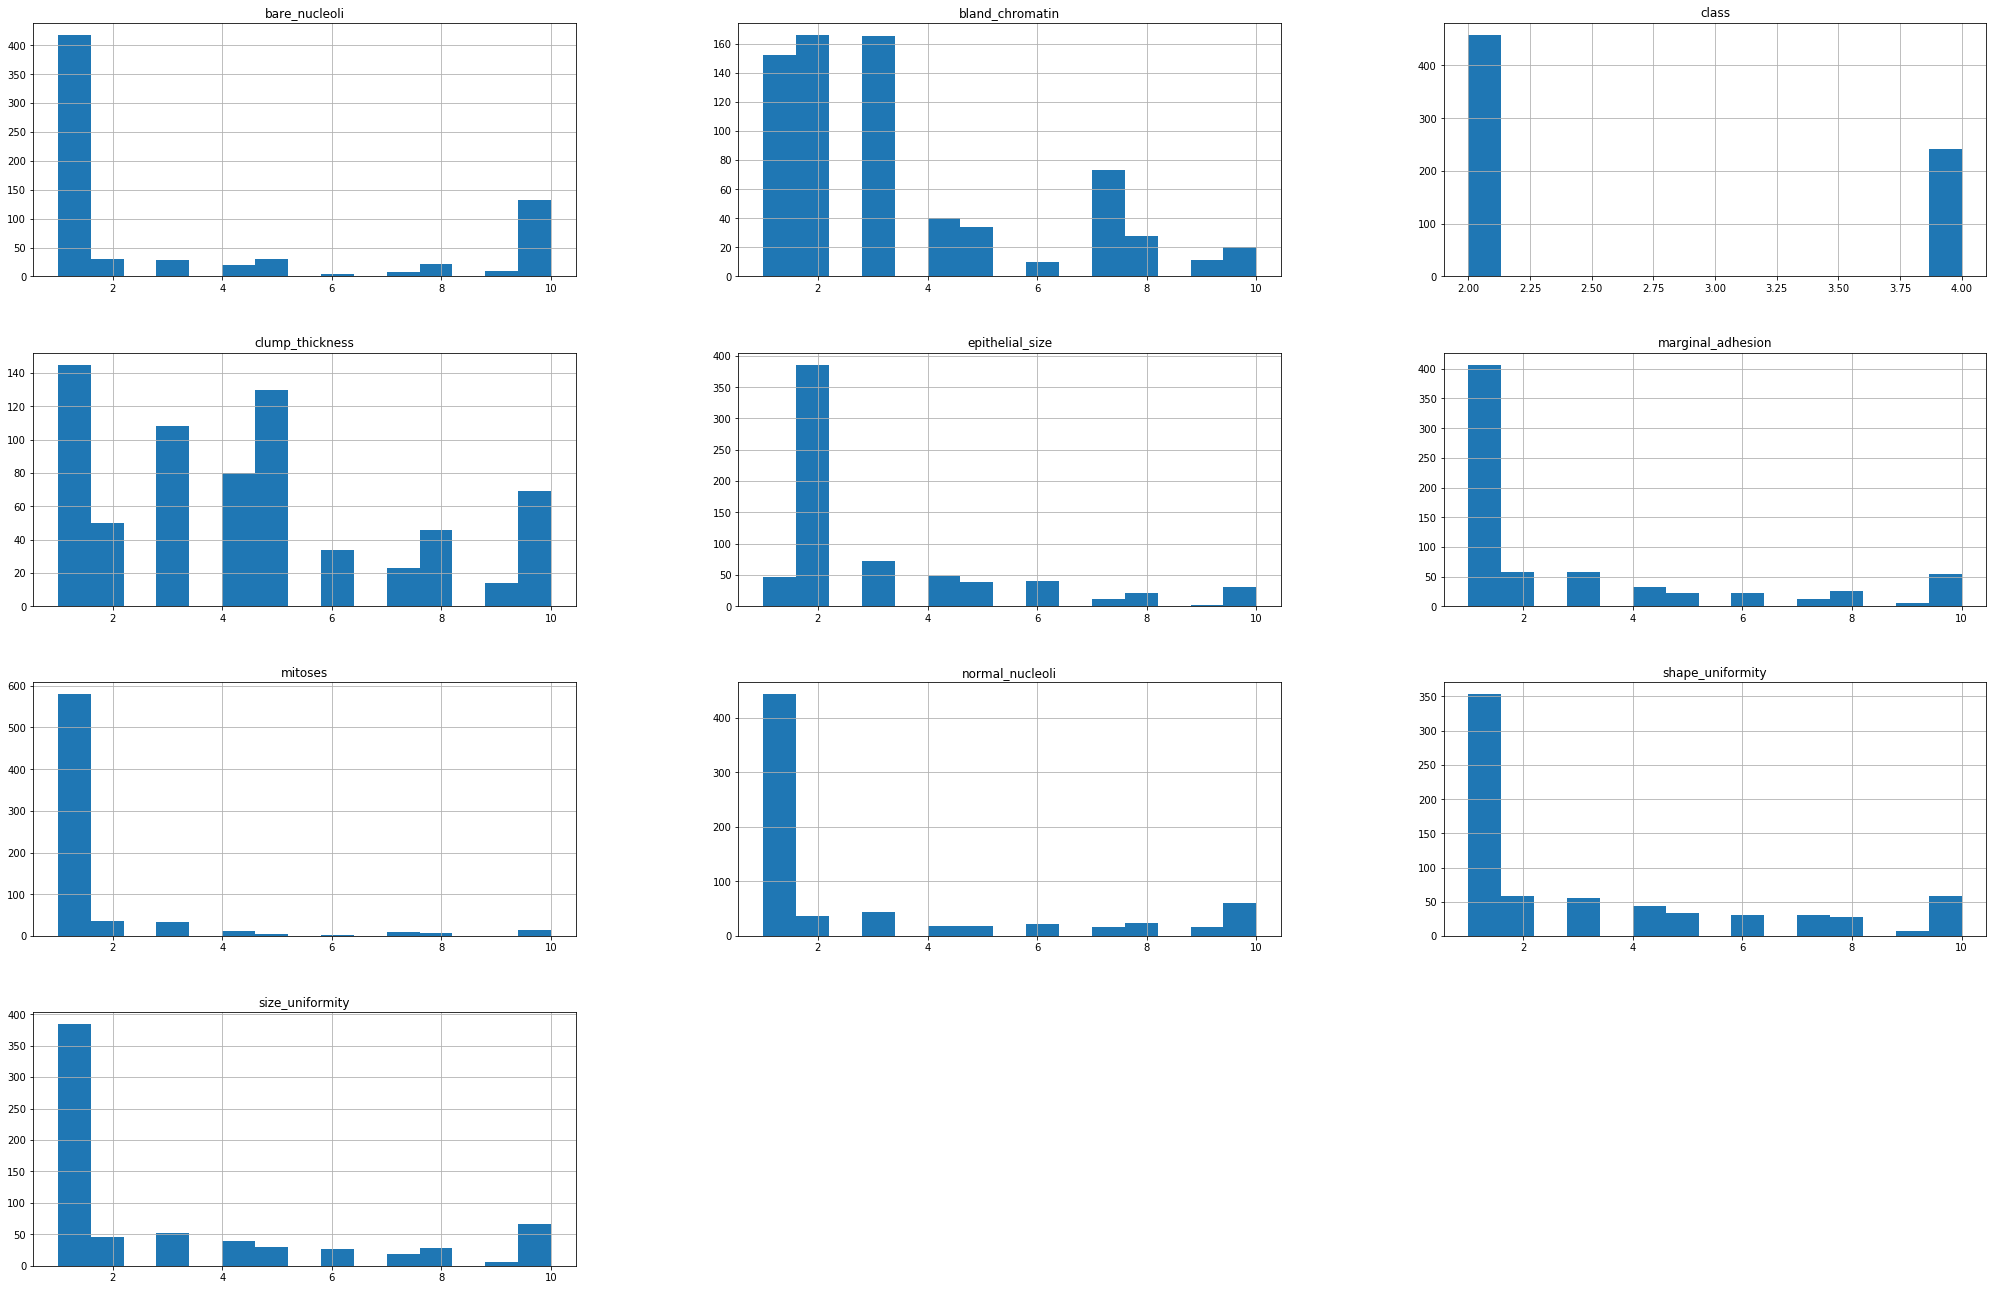

In [46]:
#Univarate analysis
data2.hist(bins=15,layout=(6,3),figsize=(35,35))

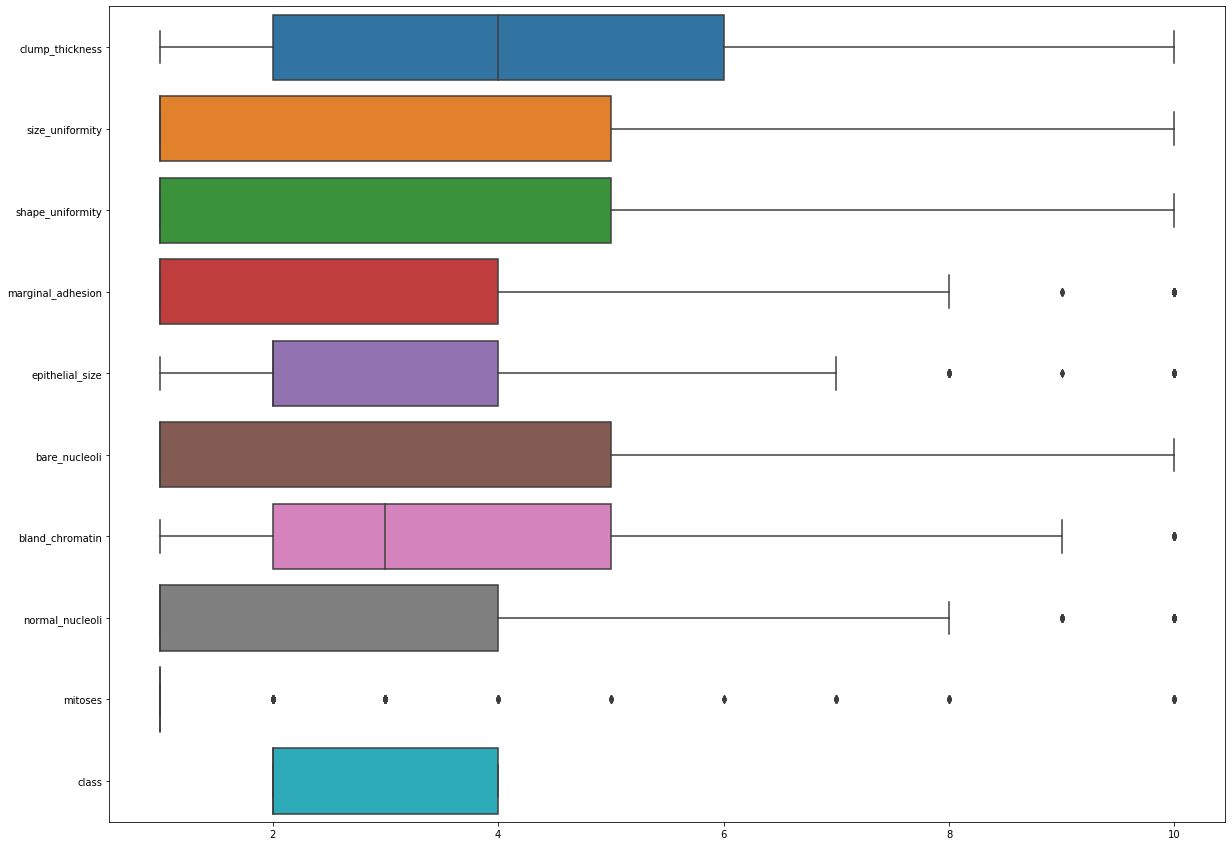

In [47]:

plt.figure(figsize= (20,15))
sns.boxplot(data=data2,orient="h")

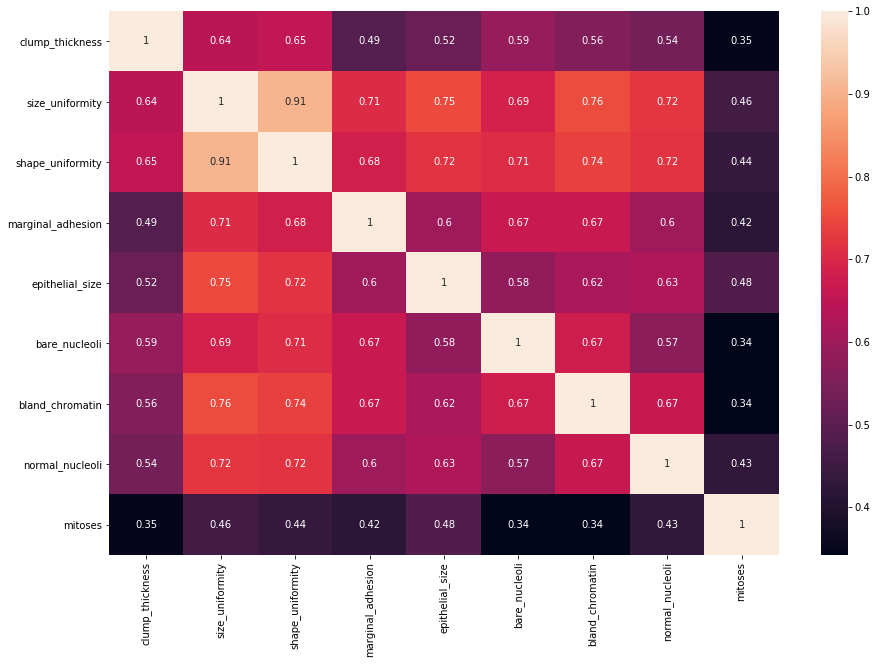

In [50]:
#Multivariate analysis
cd = data2.iloc[:,0:-1]
data_correlation = cd.corr()
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(data_correlation,xticklabels=cd.columns,yticklabels=cd.columns,annot=True)

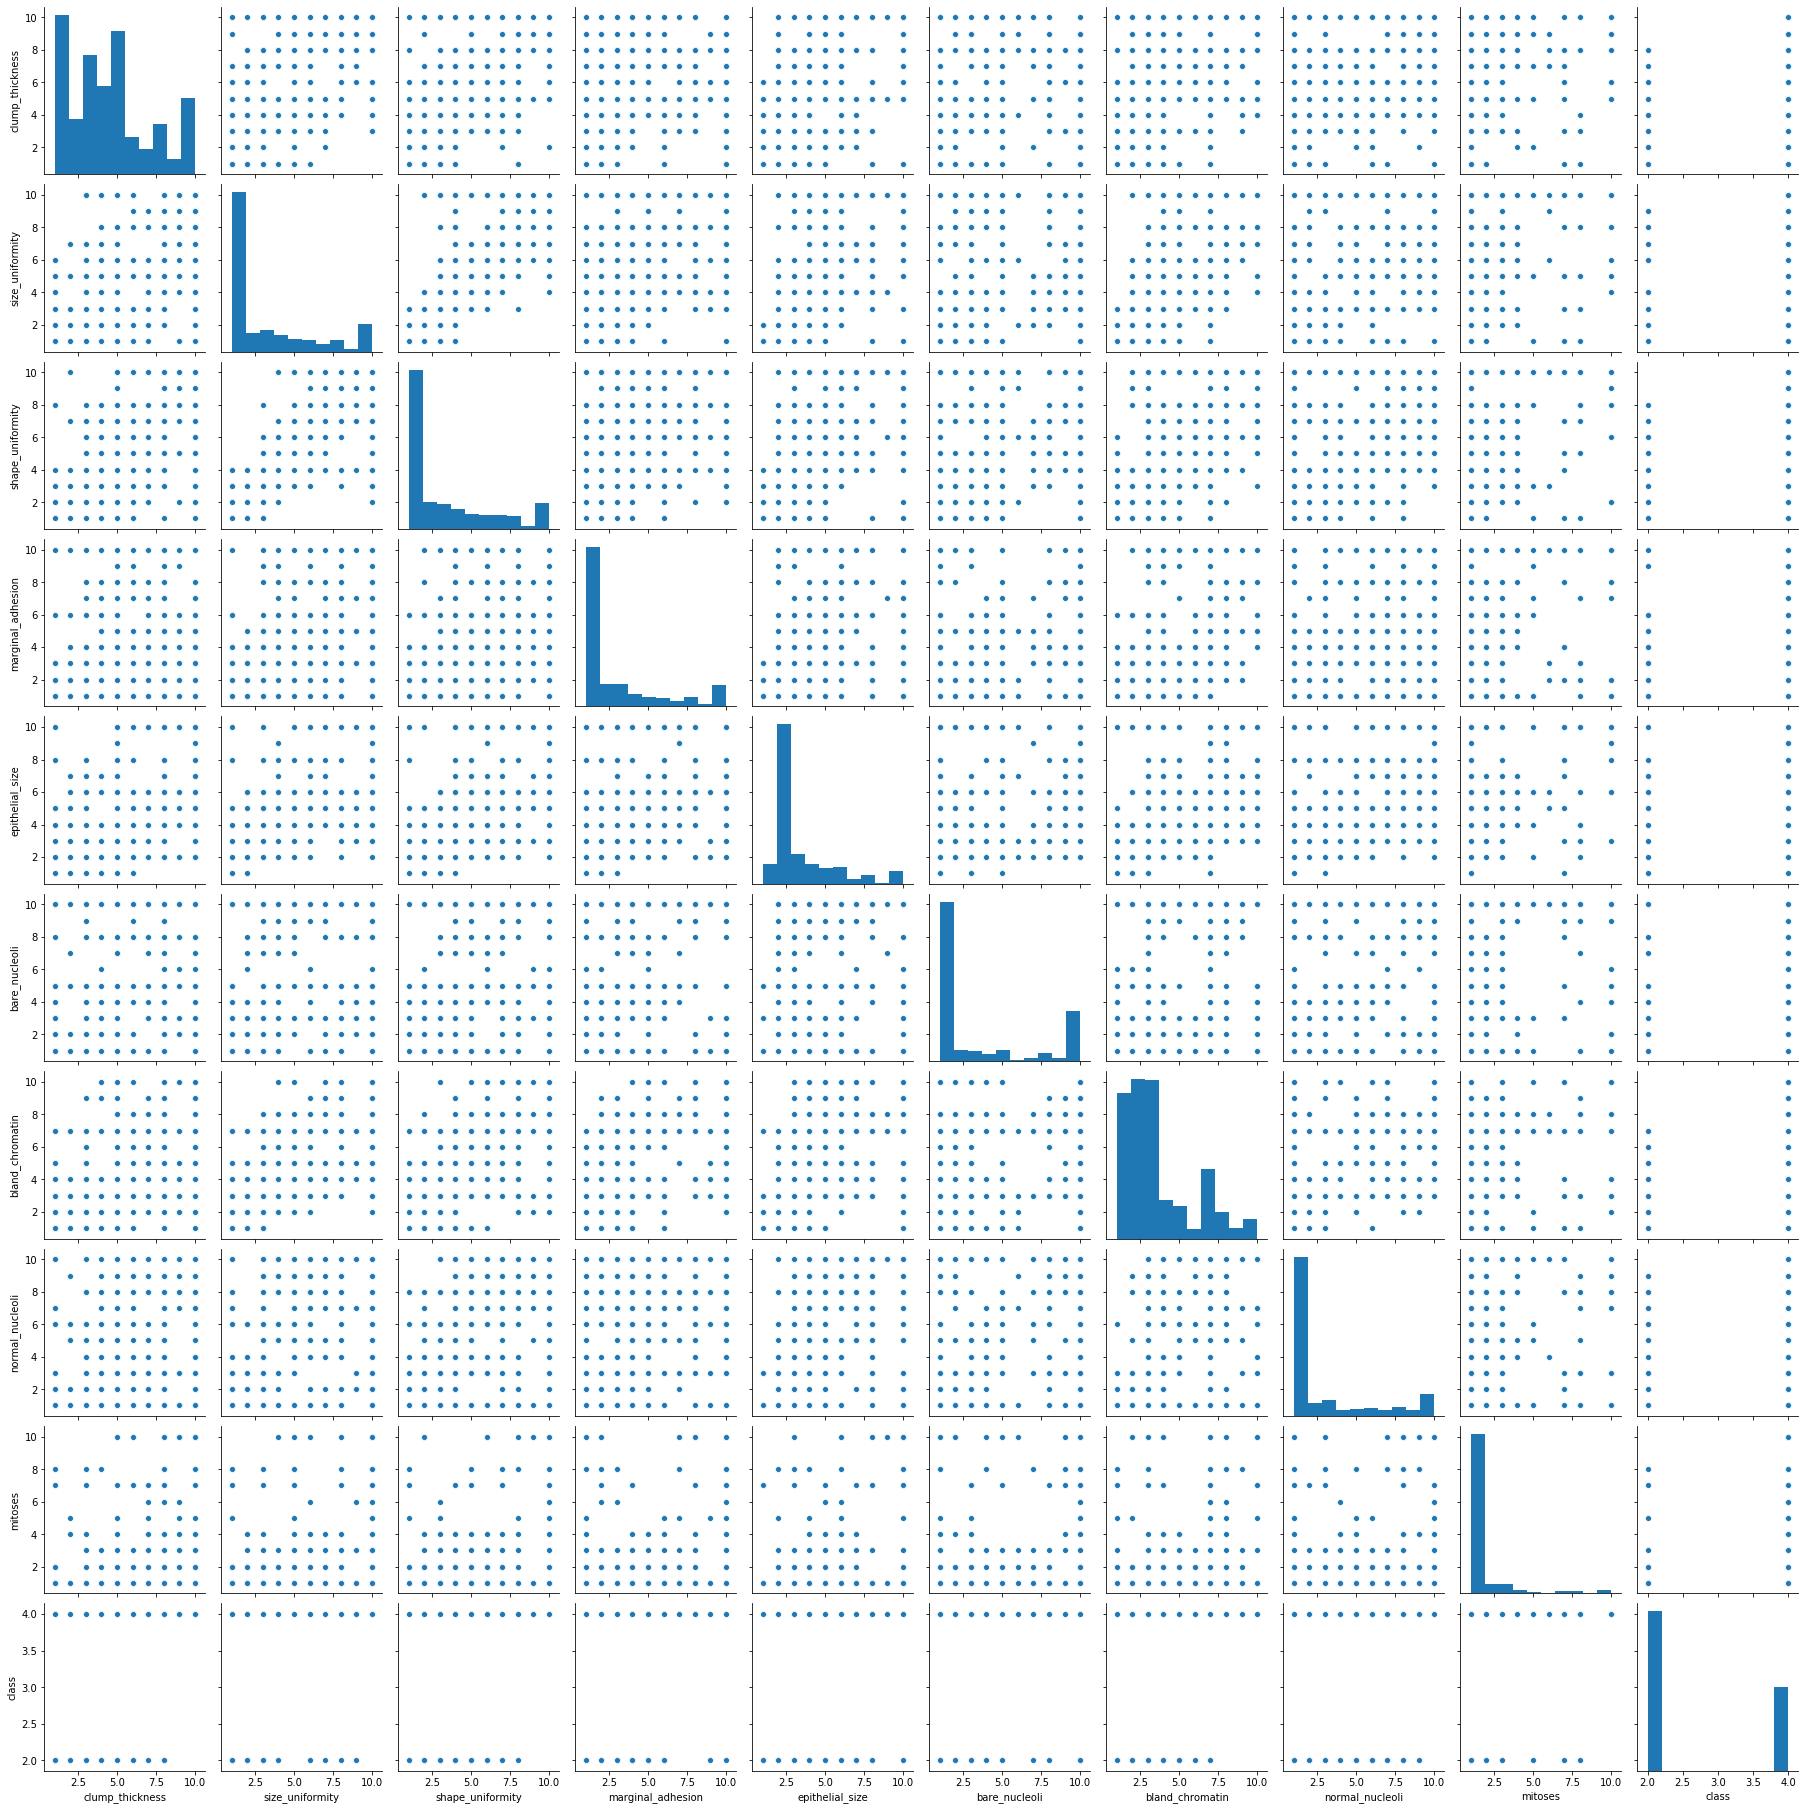

In [54]:
sns.pairplot(data2)

### Model Building



In [56]:
X = data2.drop(['class'],axis=1)
Y = data2['class']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 3)

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
from sklearn.model_selection import train_test_split

In [62]:
logi_reg=LogisticRegression()
cross_val_score(logi_reg,X,Y,cv=10,scoring='accuracy').mean()

0.9671428571428571

In [63]:
rf_clf=RandomForestClassifier(n_estimators=100)
cross_val_score(rf_clf,X,Y,cv=10,scoring='accuracy').mean()

0.9685714285714286

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100)
cross_val_score(gb_clf,X,Y,cv=10,scoring='accuracy').mean()

0.9642650103519671

In [68]:
from sklearn.svm import SVC
svc = SVC(gamma=0.025, C=3)
cross_val_score(svc,X,Y,cv=10).mean()

0.9642443064182193

In [69]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
cross_val_score(KNN,X,Y,cv=10).mean()

0.965672877846791

In [70]:
#Finalizing Model : SVC
svc_model = SVC(gamma=0.025, C=3)
svc_model.fit(X_train, y_train)

SVC(C=3, gamma=0.025)

In [74]:
prediction = svc_model.predict(X_test)
prediction

array([4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2,
       4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4,
       4, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4,
       4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4,
       2, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4], dtype=int64)

In [92]:
accuracy_score = svc_model.score(X_test,y_test)
print('Accuracy of our Prediction is {0:.2g}%'.format((accuracy_score)*100))

Accuracy of our Prediction is 97%


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           2       0.98      0.96      0.97       130
           4       0.94      0.97      0.96        80

    accuracy                           0.97       210
   macro avg       0.96      0.97      0.96       210
weighted avg       0.97      0.97      0.97       210



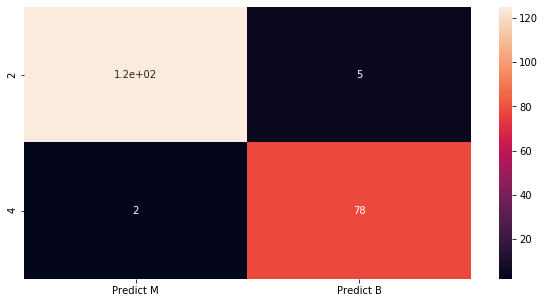

In [104]:
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, prediction, labels=[2, 4])
conf_matrix
df_cm = pd.DataFrame(conf_matrix, index = [i for i in [2,4]], columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (10,5))
sns.heatmap(df_cm,annot=True)